In [4]:
import numpy as np
import SimpleITK as sitk
import matplotlib.pyplot as plt
import os



from ipywidgets import interact, fixed
from IPython.display import display

%matplotlib inline

# Calculate parameters low and high from window and level
def wl_to_lh(window, level):
    low = level - window/2
    high = level + window/2
    return low,high

def display_image(img, x=None, y=None, z=None, window=None, level=None):
    # Convert SimpleITK image to NumPy array
    img_array = sitk.GetArrayFromImage(img)
    
    # Get image dimensions in millimetres
    size = img.GetSize()
    spacing = img.GetSpacing()
    width  = size[0] * spacing[0]
    height = size[1] * spacing[1]
    depth  = size[2] * spacing[2]
    
    if x is None:
        x = np.floor(size[0]/2).astype(int)
    if y is None:
        y = np.floor(size[1]/2).astype(int)
    if z is None:
        z = np.floor(size[2]/2).astype(int)
    
    if window is None:
        window = np.max(img_array) - np.min(img_array)
    
    if level is None:
        level = window / 2 + np.min(img_array)
    
    low,high = wl_to_lh(window,level)

    # Display the orthogonal slices
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

    ax1.imshow(img_array[z,:,:], cmap='gray', clim=(low, high), extent=(0, width, height, 0))
    ax2.imshow(img_array[:,y,:], origin='lower', cmap='gray', clim=(low, high), extent=(0, width,  0, depth))
    ax3.imshow(img_array[:,:,x], origin='lower', cmap='gray', clim=(low, high), extent=(0, height, 0, depth))

    # Additionally display crosshairs
    ax1.axhline(y * spacing[1], lw=1)
    ax1.axvline(x * spacing[0], lw=1)
    
    ax2.axhline(z * spacing[2], lw=1)
    ax2.axvline(x * spacing[0], lw=1)
    
    ax3.axhline(z * spacing[2], lw=1)
    ax3.axvline(y * spacing[1], lw=1)

    plt.show()
    
def interactive_view(img):
    size = img.GetSize() 
    img_array = sitk.GetArrayFromImage(img)
    interact(display_image,img=fixed(img),
             x=(0, size[0] - 1),
             y=(0, size[1] - 1),
             z=(0, size[2] - 1),
             window=(0,np.max(img_array) - np.min(img_array)),
             level=(np.min(img_array),np.max(img_array)));
    
def label_overlay(img, seg):
    minmax = sitk.MinimumMaximumImageFilter()
    minmax.Execute(img)
    low, high = minmax.GetMinimum(), minmax.GetMaximum()
    img_norm = (img - low) / (high - low)
    img_uint8 = sitk.Cast(256 * img_norm, sitk.sitkUInt8)
    return sitk.LabelOverlay(img_uint8, seg)

def display_overlay(img, seg, *args, **kwargs):
    display_image(label_overlay(img, seg), *args, **kwargs)
    


In [93]:
# paths = ['/Volumes/FAIR/Registered_MPS/MPS1/CT.nii.gz',
#          '/Volumes/FAIR/Registered_MPS/MPS2/CT.nii.gz',
#          '/Volumes/FAIR/Registered_MPS/MPS3/CT.nii.gz',
#          '/Volumes/FAIR/Registered_MPS/MPS4/CT.nii.gz',
#          '/Volumes/FAIR/Registered_MPS/MPS5/CT.nii.gz',
#          '/Volumes/FAIR/Registered_MPS/MPS6/CT.nii.gz',
#          '/Volumes/FAIR/Registered_MPS/MPS7/CT.nii.gz',
#          '/Volumes/FAIR/Registered_MPS/MPS8/CT.nii.gz',
#          '/Volumes/FAIR/Registered_MPS/MPS9/CT.nii.gz',
#          '/Volumes/FAIR/Registered_MPS/MPS10/CT.nii.gz',
#          '/Volumes/FAIR/Registered_MPS/MPS11/CT.nii.gz',
#          '/Volumes/FAIR/Registered_MPS/MPS12/CT.nii.gz',
#          '/Volumes/FAIR/Registered_MPS/MPS13/CT.nii.gz',
#          '/Volumes/FAIR/Registered_MPS/MPS14/CT.nii.gz',
#         ]


paths = ['/Volumes/FAIR/Registered_MPS/SDH2/CT.nii.gz',
         '/Volumes/FAIR/Registered_MPS/SDH4/CT.nii.gz',
         '/Volumes/FAIR/Registered_MPS/SDH7/CT.nii.gz',
         '/Volumes/FAIR/Registered_MPS/SDH8/CT.nii.gz',
         '/Volumes/FAIR/Registered_MPS/SDH9/CT.nii.gz',
         '/Volumes/FAIR/Registered_MPS/SDH11/CT.nii.gz',
         '/Volumes/FAIR/Registered_MPS/SDH12/CT.nii.gz',
        '/Volumes/FAIR/Registered_MPS/SDH14/CT.nii.gz',
        '/Volumes/FAIR/Registered_MPS/SDH16-2/CT.nii.gz',
        '/Volumes/FAIR/Registered_MPS/SDH24/CT.nii.gz',
         '/Volumes/FAIR/Registered_MPS/CONT4/CT.nii.gz',
         '/Volumes/FAIR/Registered_MPS/CONT5/CT.nii.gz',
         '/Volumes/FAIR/Registered_MPS/CONT7/CT.nii.gz',
        '/Volumes/FAIR/Registered_MPS/EDH7/CT.nii.gz',
        '/Volumes/FAIR/Registered_MPS/Sample3-Pre/CT.nii.gz',
        '/Volumes/FAIR/Registered_MPS/Sample3-Post/S3_Post-op.nrrd',
        '/Volumes/FAIR/Registered_MPS/Sample4-Pre/S4_Pre-op.nrrd',
        '/Volumes/FAIR/Registered_MPS/tutorial3/CT.nii.gz']

# for i in range(len(paths)):
for i in range(1,len(paths)):
    path = paths[i]
    # We convert it to `float32` for compatibility with some functions we'll use later
    img = sitk.Cast(sitk.ReadImage(path), sitk.sitkFloat32)
#     display_image(img,window=120,level=40)
    img_gauss = sitk.DiscreteGaussian(img, variance=1)
    # display_image(img_gauss,window=120,level=40)
    seg = (img > 300)
#     display_overlay(img, seg)
    seg_array = sitk.GetArrayFromImage(seg)
    mp = sitk.ReadImage(os.path.split(path)[0] + '/Midplane_Q.nii.gz')
    mp_array = sitk.GetArrayFromImage(mp)
    Skull_contour = np.multiply(mp_array,seg_array)
    Skull_contour1 = sitk.GetImageFromArray(Skull_contour)
    Skull_contour1.CopyInformation(img)
    sitk.WriteImage(Skull_contour1, os.path.split(path)[0] + '/Skull_contour.nii.gz')

## resect CT volume

In [80]:
path = '/Volumes/FAIR/Eric_Midlinedeliniation/Self-MPS/SDH8/mps.nii.gz'
img = sitk.Cast(sitk.ReadImage(path), sitk.sitkFloat32)
img_array = sitk.GetArrayFromImage(img)

In [82]:
img_array1 = np.zeros(img_array.shape) 

In [83]:
img_array1[4:42,:,:] = img_array[9:,:,:]

In [84]:
img_ = sitk.GetImageFromArray(img_array1)
img_.CopyInformation(img)


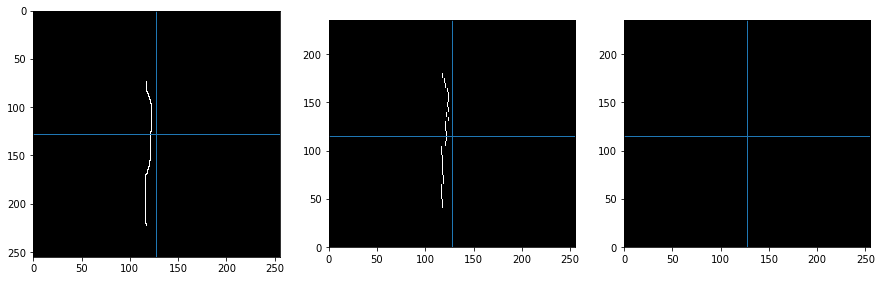

In [85]:
display_image(img_)

In [86]:
sitk.WriteImage(img_, os.path.split(path)[0] + '/mps1.nii.gz')